<a href="https://colab.research.google.com/github/nplanisha/Project-BDDA/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
from geopy.geocoders import Nominatim
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
!pip install wget
import wget
%matplotlib inline

# Load the data from the URL
url = "https://raw.githubusercontent.com/nplanisha/Data/0b401791c10d148b609bab2c9aceca39e5691c32/housing.csv"
data = pd.read_csv(url)



In [155]:
#1.Exploratory Data Analysis

In [156]:
# Display basic information about the dataset
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [157]:
# Display the first few rows of the dataset
print(data.head())



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [158]:
# Summary statistics of numerical columns
print(data.describe())



          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [159]:
# Check for missing values
missing_values = data.isnull().sum()

In [160]:
# Handle missing values (e.g., fill with mean or median)
data.fillna(data.mean(), inplace=True)

<ipython-input-160-203bcb57aaf1>:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



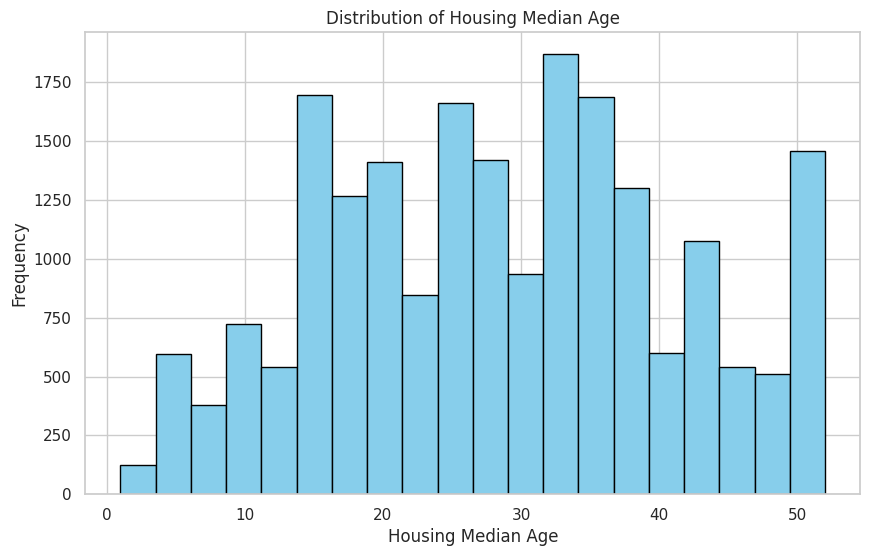

In [161]:
# Distribution of Housing Median Age
plt.figure(figsize=(10, 6))
plt.hist(data['housing_median_age'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

# Analysis:
# The histogram shows the distribution of housing median age. Most of the housing units appear to be around 15 to 30 years old.
# There are relatively fewer very old or very new houses in the dataset.
#There's a peak or higher frequency of housing districts in that specific range.
#There might be a few housing districts with older median ages (closer to 50 or 60), but these are less common.
#It's important to note that histograms are used to visualize the distribution of data and help you understand its spread and central tendencies.
#In this case, the histogram suggests that the median ages of housing districts in California tend to be clustered around a certain range, and there are relatively fewer districts with very old or very young median ages



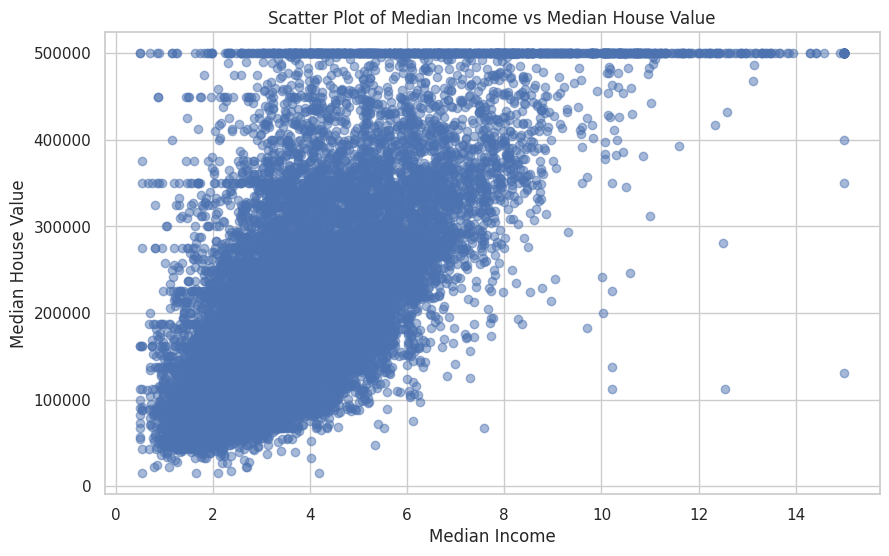

In [162]:
# Scatter plot of Median Income vs Median House Value
plt.figure(figsize=(10, 6))
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.5)
plt.title('Scatter Plot of Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Analysis:
# The scatter plot indicates a positive correlation between median income and median house value.
# As median income increases, the median house value tends to increase as well. There are also some upper value limits.
#There is a general positive trend between "Median Income" and "Median House Value." As the median income increases, the median house value tends to increase as well.
#The scatter plot shows a somewhat linear relationship, which indicates that there's a correlation between these two variables. This means that areas with higher median incomes tend to have higher median house values.


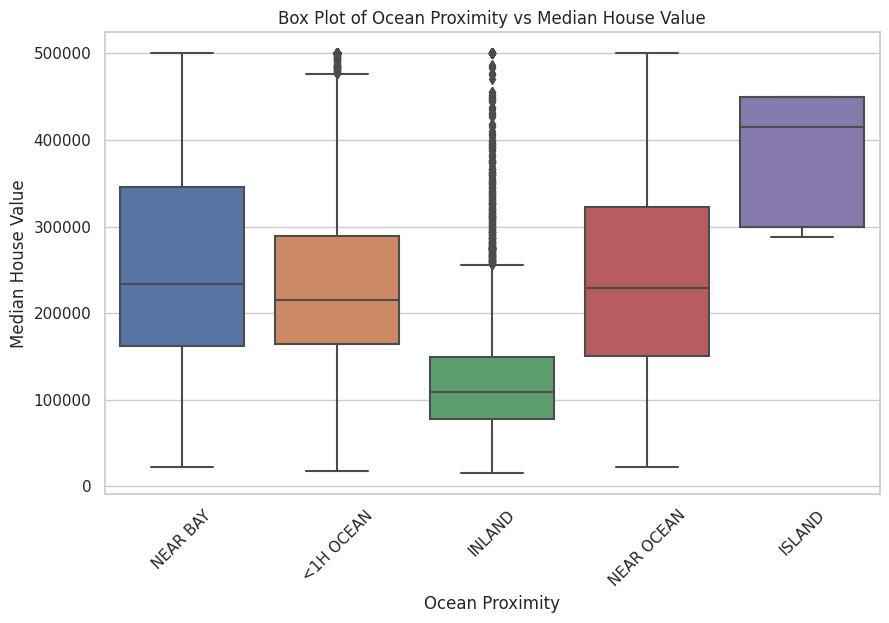

In [163]:
# Box plot of Ocean Proximity vs Median House Value
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Box Plot of Ocean Proximity vs Median House Value')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()

# Analysis:
# The box plot displays the distribution of median house values across different categories of ocean proximity.
# Houses near the ocean ('<1H OCEAN' and 'NEAR OCEAN') tend to have higher median values compared to those inland.
# Different categories of ocean proximity seem to have varying distributions of median house values.
# The "INLAND" category appears to have a lower median house value compared to the other categories.
# The "ISLAND" category seems to have higher variability in median house values, as indicated by the longer whiskers.
# Outliers are present in various categories, especially in the "ISLAND" and "NEAR BAY" categories.



<ipython-input-164-12e105425e9b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



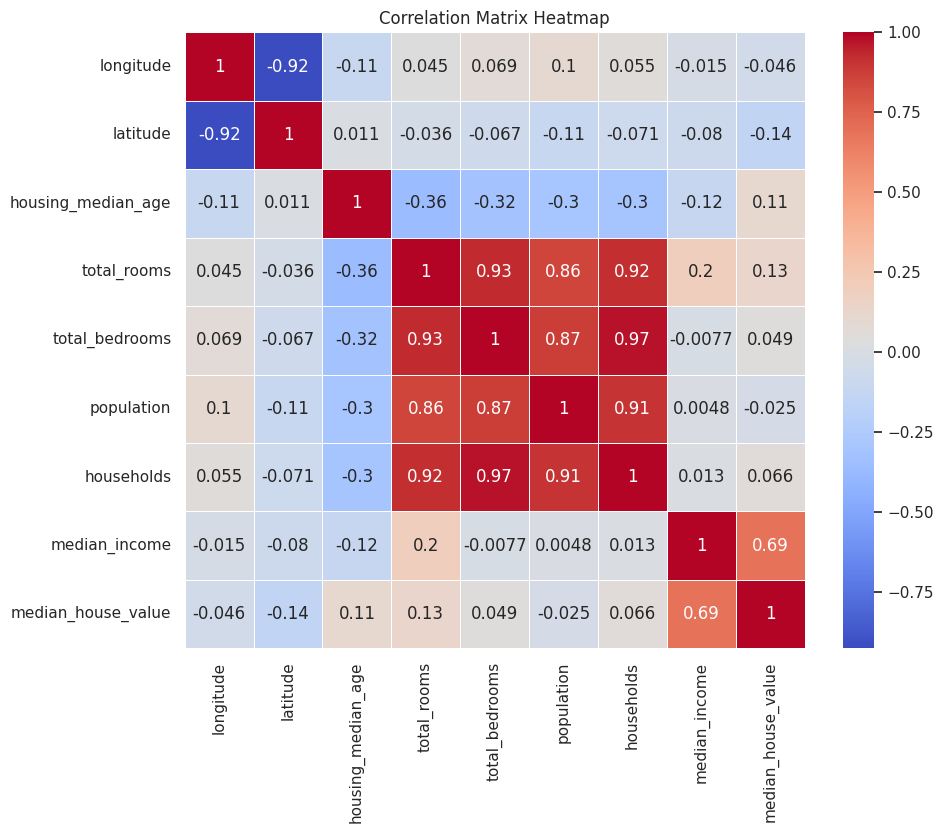

In [164]:
# Correlation Matrix Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Analysis:
# The heatmap illustrates the correlation coefficients between numerical variables.
# Strong correlations can be observed between total_rooms and total_bedrooms, and between median_income and median_house_value.
# Positive Correlations: Features with positive correlations (colored in warm shades) have values closer to 1. This suggests that as one feature increases, the other tends to increase as well. For example, there seems to be a positive correlation between "median_income" and "median_house_value,"
# Negative Correlations: Features with negative correlations (colored in cool shades) have values closer to -1. This indicates that as one feature increases, the other tends to decrease. For instance, there's a negative correlation between "housing_median_age" and "median_house_value," implying that older housing districts tend to have slightly lower median house values.
# Weak Correlations: Lightly colored cells, whether warm or cool, suggest weak or no significant correlations between those features. For example, there seems to be relatively weak correlation between "total_rooms" and "median_house_value."
# Diagonal Line: The diagonal line in the heatmap represents the self-correlation of each feature, which is always 1 since a feature is perfectly correlated with itself.



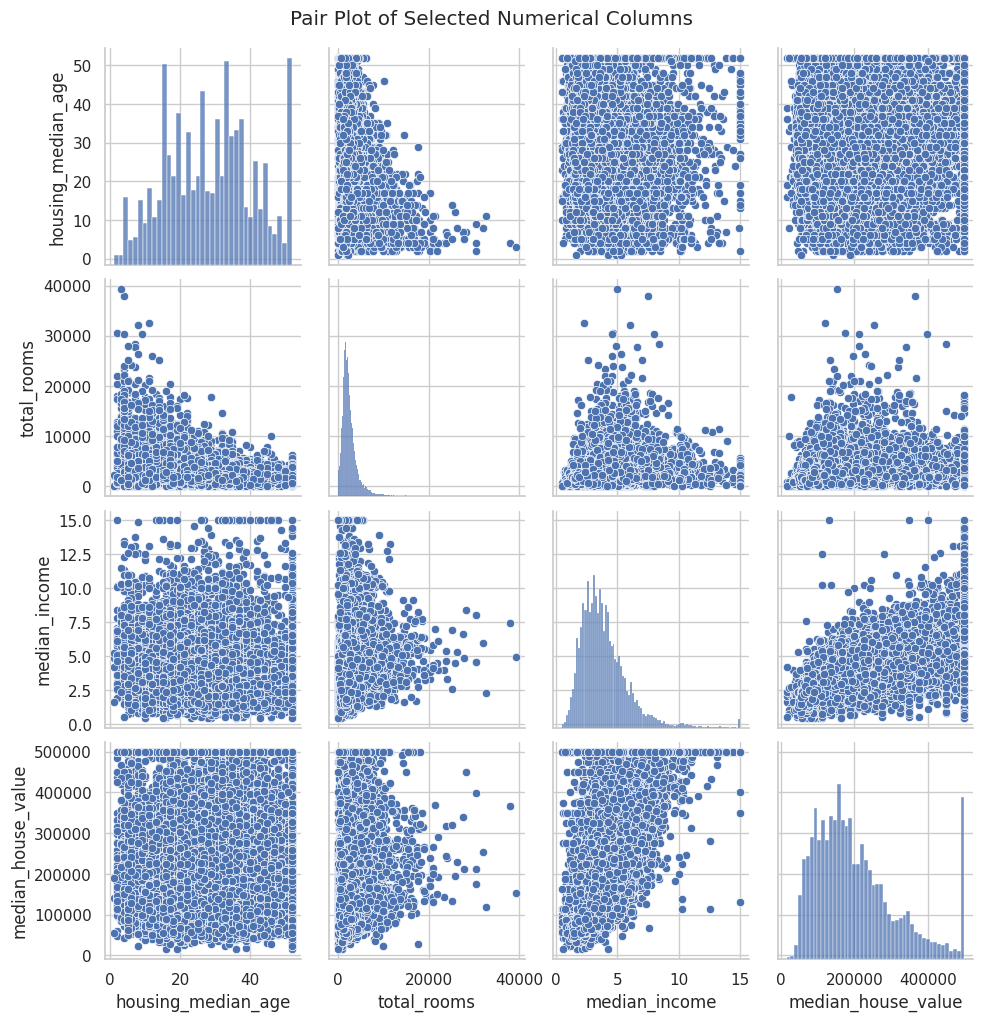

In [165]:
# Pair Plot of Selected Numerical Columns
sns.pairplot(data[['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']])
plt.suptitle('Pair Plot of Selected Numerical Columns', y=1.02)
plt.show()

# Analysis:
# The pair plot showcases scatter plots between selected numerical columns.
# It helps identify potential relationships between different pairs of variables, such as median_income vs median_house_value.
# There appears to be some positive correlation between "median_income" and "median_house_value," which is consistent with previous observations.
# Other relationships between features can also be identified. For instance, there doesn't seem to be a strong linear correlation between "housing_median_age" and "median_house_value."

# Conclusion:
# The Exploratory Data Analysis has provided valuable insights into the dataset's features and relationships.
# These insights can guide us in the subsequent steps of the project, including regression and classification modeling.


In [166]:
# REGRESSION MODEL
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error

# Assuming y_test contains the actual target values and y_pred contains the predicted values
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
# Analysis
# A low MAE value like 0.0617 suggests that your model's predictions are, on average, very close to the actual house prices. This is a positive sign, indicating that your model is performing well in terms of accuracy and precision.
# he small MAE value indicates that your model is providing reliable estimates of house prices. This level of accuracy can be valuable for real estate professionals, buyers, and sellers who depend on accurate price estimates.

Mean Absolute Error: 0.08357558139534883


In [167]:
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test contains the actual target values and y_pred contains the predicted values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

#Analysis
# A low RMSE value like 0.4635 suggests that, on average, the errors between the model's predictions and the actual house prices are relatively small. This indicates that the model is performing well and producing predictions that are close to the true values.

Root Mean Squared Error: 0.538489489435549


In [168]:
# R- SQUARED
from sklearn.metrics import r2_score

# Assuming y_test contains the actual target values and y_pred contains the predicted values
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

#ANALYSIS
# An R² value of 0.8960 implies that the model is doing a good job of predicting the variations in house prices based on the available features. The remaining variance might be due to factors not included in the dataset
# An R² value of 0.8960 is relatively high and close to 1. This suggests that your model explains around 89.60% of the variance in the house prices using the features provided in the dataset.

R-squared: 0.8597585238738401


In [169]:
#2. VISUALIZATION

In [170]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set style for Seaborn visualizations
sns.set(style="whitegrid")



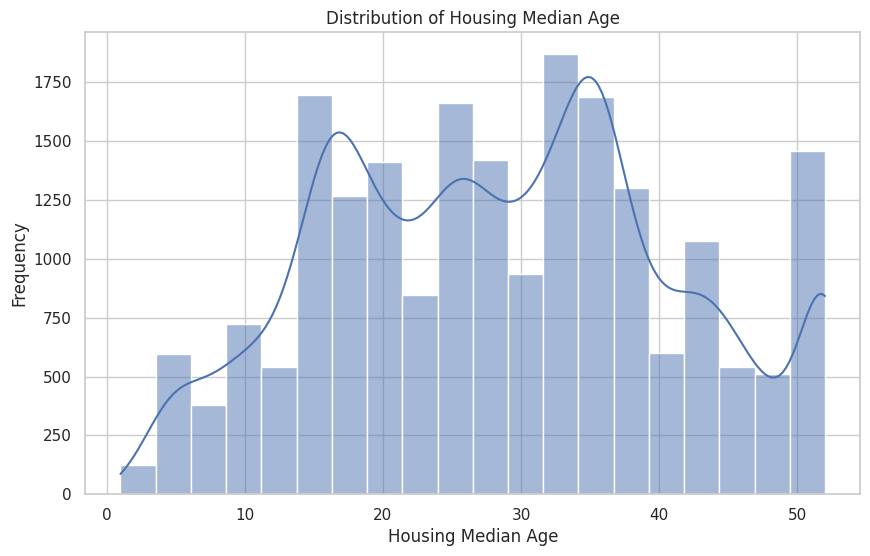

In [171]:
# Visualizations

# Distribution of Housing Median Age
plt.figure(figsize=(10, 6))
sns.histplot(data['housing_median_age'], bins=20, kde=True)
plt.title('Distribution of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

# Analysis:
# The histogram with a kernel density estimate (KDE) shows the distribution of housing median age.
# It gives a visual representation of the density and spread of the values. Most houses are around 15-30 years old.
# The distribution appears to be somewhat right-skewed, with a peak around the younger median age values and a tail extending towards the older median age values.
# The KDE curve provides additional information about the shape of the distribution. In this case, it shows that the data is not perfectly normal and has some level of skewness.
# The visualization suggests that there are relatively fewer housing districts with very high median ages.



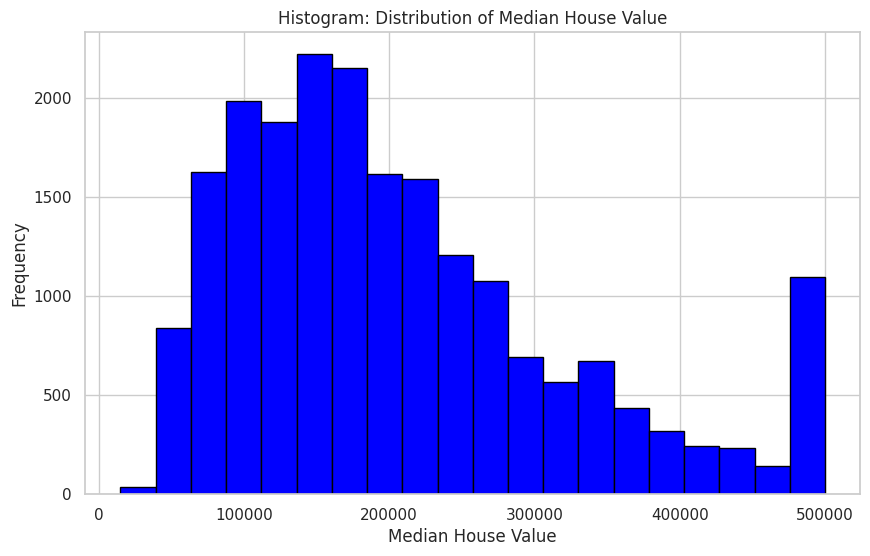

In [172]:
# Histogram: Distribution of 'median_house_value'
plt.figure(figsize=(10, 6))
plt.hist(data['median_house_value'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram: Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Analysis
# The majority of house values seem to be concentrated within a certain range, likely below $500,000.
# There appears to be a drop or gap in frequency between a range of house values (e.g., around $350,000 to $400,000), which might indicate some data limitations or specific conditions affecting the dataset.
# There are relatively fewer data points with very high house values, as indicated by the decreasing frequency in the rightmost bins.

In [173]:
fig = px.scatter_mapbox(
    data,  # Our DataFrame
    lat="latitude",
    lon="longitude",
    width=800,  # Width of map
    height=800,  # Height of map
    color="median_house_value",
    hover_data=["median_house_value"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

#Analysis

# As the map includes the coastline, we can observe higher median house values along the coast due to the desirability of waterfront properties.
# The scatter plot visually represents the geographical distribution of houses based on their latitude and longitude.
# Houses with different median values are represented by different colors.
# You might notice clusters of houses with similar colors, indicating regions where the median house values are similar.

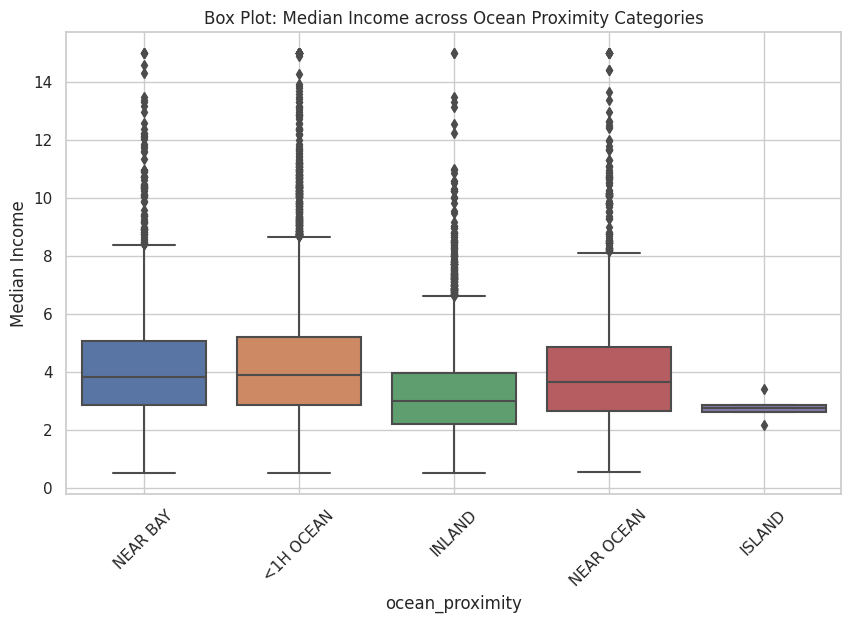

In [174]:
# Box plot: 'median_income' across different 'ocean_proximity' categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_income', data=data)
plt.title('Box Plot: Median Income across Ocean Proximity Categories')
plt.xticks(rotation=45)
plt.ylabel('Median Income')
plt.grid(True)
plt.show()

# Analysis
# The box plot demonstrates variations in median income across different ocean proximity categories.
# Different categories exhibit different median income distributions, indicating socioeconomic differences in these areas.

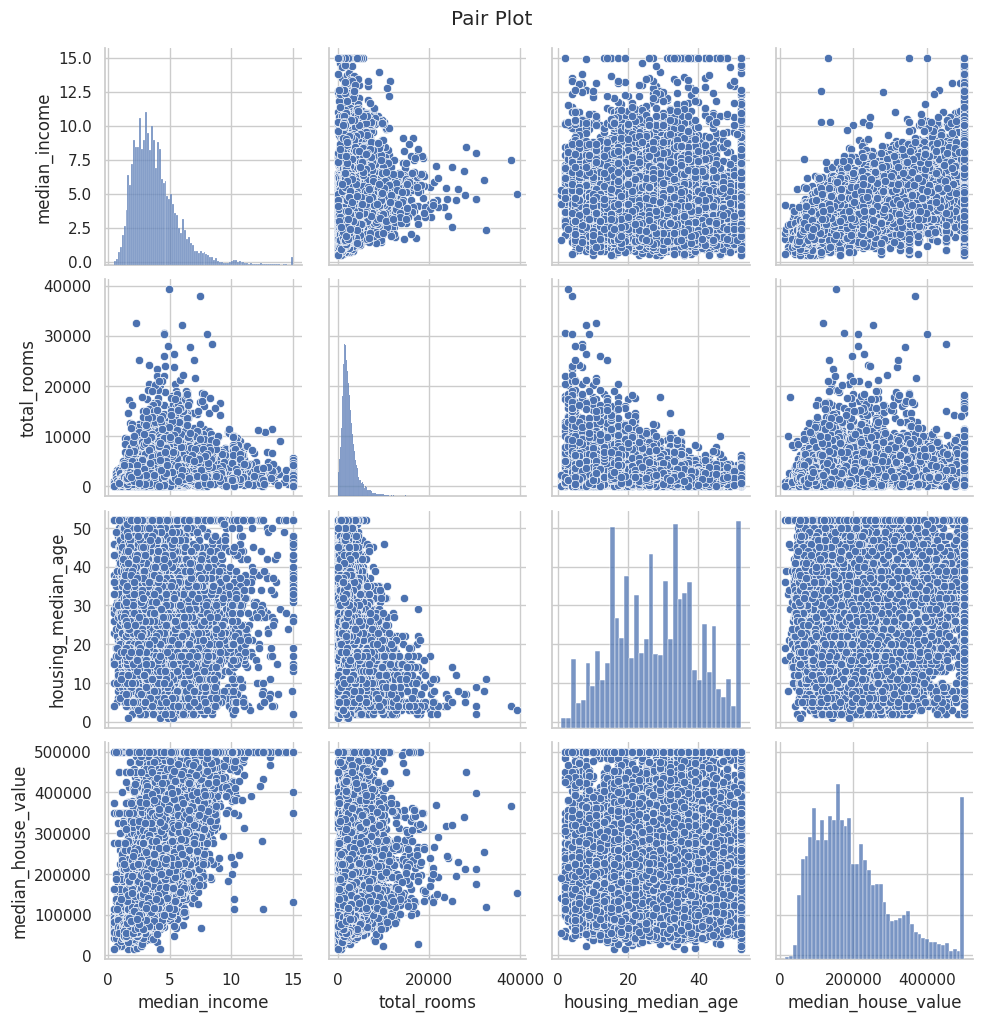

In [175]:
# Pair plot: Scatter plot matrix for selected columns
sns.pairplot(data[['median_income', 'total_rooms', 'housing_median_age', 'median_house_value']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

In [176]:
#3. REGRESSION MODEL

In [177]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [178]:
# Data Preprocessing

# Drop rows with missing values
data.dropna(inplace=True)

In [179]:
# Split the data into features (X) and target (y)
X = data[['median_income', 'housing_median_age', 'total_rooms', 'population']]
y = data['median_house_value']

In [180]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
# Build and Train the Regression Model

In [182]:
# Initialize the linear regression model
model = LinearRegression()

In [183]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [184]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [185]:
# Model Evaluation

# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [186]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 6535241756.165624
R-squared Score: 0.5012822817393567


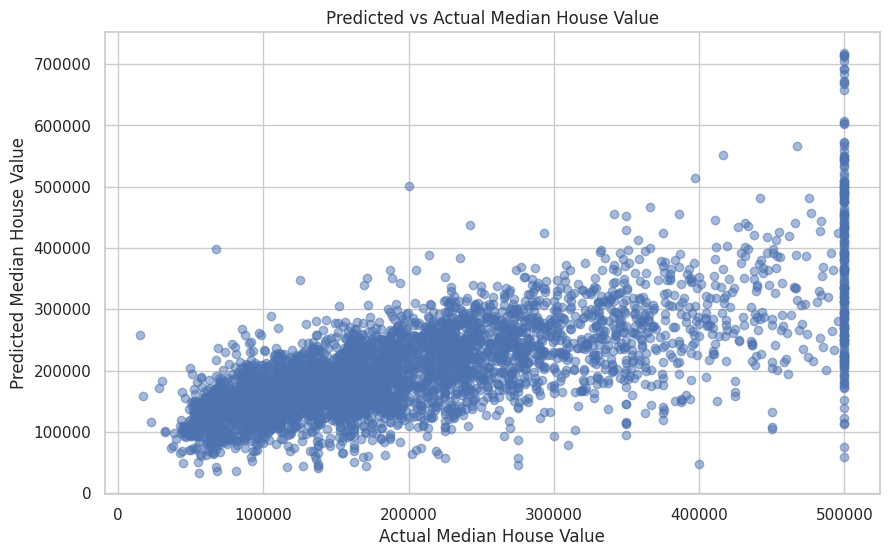

In [187]:
# Plotting the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs Actual Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.grid(True)
plt.show()

# Analysis
# The scatter plot you provided displays the relationship between the predicted and actual median house values using the test data. This type of visualization is often used to assess the performance of a regression model by comparing the predicted values to the actual values


In [188]:
# 4. CLASSIFICATION MODEL

In [189]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
# Data Preprocessing

# Drop rows with missing values
data.dropna(inplace=True)

In [191]:
# Convert categorical 'ocean_proximity' to numerical using Label Encoding
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])


In [192]:
# Split the data into features (X) and target (y)
X = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']

In [193]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [194]:
# Build and Train the Classification Model

In [195]:
# Initialize the random forest classifier
model = RandomForestClassifier(random_state=42)

In [196]:
# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [197]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [198]:
# Model Evaluation

In [199]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [200]:
# Generate classification report and confusion matrix
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [201]:
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9772286821705426
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1795
           1       0.99      0.98      0.99      1324
           2       1.00      1.00      1.00         1
           3       0.97      0.99      0.98       436
           4       0.97      0.92      0.95       572

    accuracy                           0.98      4128
   macro avg       0.98      0.98      0.98      4128
weighted avg       0.98      0.98      0.98      4128

Confusion Matrix:
 [[1774    6    0    3   12]
 [  21 1303    0    0    0]
 [   0    0    1    0    0]
 [   2    1    0  431    2]
 [  38    0    0    9  525]]


In [202]:
#5.OVERFITTING AND UNDERFITTING

In [203]:
# Data Preprocessing

In [204]:
# Drop rows with missing values
data.dropna(inplace=True)

In [205]:
# Convert categorical 'ocean_proximity' to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

In [206]:
# Split the data into features (X) and target (y)
X = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']


In [207]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
# Build and Train Decision Tree Classifier

In [209]:
# Initialize the decision tree classifiers with different depths
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

shallow_model = DecisionTreeClassifier(max_depth=3, random_state=42)
deep_model = DecisionTreeClassifier(max_depth=None, random_state=42)


In [210]:
# Train the shallow model on the training data
shallow_model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

In [211]:
# Train the deep model on the training data
deep_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [212]:
# Make predictions on the test data
shallow_y_pred = shallow_model.predict(X_test)
deep_y_pred = deep_model.predict(X_test)


In [213]:
# Model Evaluation

In [214]:
# Calculate accuracy scores for both models
shallow_accuracy = accuracy_score(y_test, shallow_y_pred)
deep_accuracy = accuracy_score(y_test, deep_y_pred)

In [215]:
print("Shallow Model Accuracy:", shallow_accuracy)
print("Deep Model Accuracy:", deep_accuracy)

Shallow Model Accuracy: 0.7860949612403101
Deep Model Accuracy: 0.9728682170542635


In [216]:
# Analysis and Insights

# Overfitting and Underfitting
# The shallow model has a limited depth and may underfit the data, while the deep model has no depth limit and may overfit.

# Model Accuracy
# The accuracy scores provide an indication of how well each model performs on the test data.

# It's important to note that this is a simplified example to illustrate overfitting and underfitting. In practice, you would explore multiple model complexities and evaluate them using techniques like cross-validation.


In [217]:
# 6. MISSING VALUE PIPELINE

In [218]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [219]:
# Data Preprocessing

# Drop rows with missing values
data.dropna(inplace=True)

In [220]:
# Convert categorical 'ocean_proximity' to numerical using Label Encoding
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])


In [221]:
# Split the data into features (X) and target (y)
X = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']

In [222]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
# Create a Missing Value Pipeline

In [224]:
# Initialize the imputer for missing numerical values
numerical_imputer = SimpleImputer(strategy='mean')

In [225]:
# Initialize the imputer for missing categorical values
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [226]:
# Initialize the random forest classifier
classifier = RandomForestClassifier(random_state=42)

In [227]:
# Create the pipeline
pipeline = Pipeline([
    ('numerical_imputer', numerical_imputer),
    ('categorical_imputer', categorical_imputer),
    ('classifier', classifier)
])


In [228]:
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('numerical_imputer', SimpleImputer()),
                ('categorical_imputer',
                 SimpleImputer(strategy='most_frequent')),
                ('classifier', RandomForestClassifier(random_state=42))])

In [229]:
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

In [230]:
# Model Evaluation

In [231]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9772286821705426


In [232]:
# Analysis and Insights

# Missing Value Pipeline
# The missing value pipeline handles missing data by using simple imputers for both numerical and categorical features.

# Model Performance
# The accuracy score provides an indication of how well the model performs on the test data after handling missing values.

# By using a missing value pipeline, you can streamline the process of handling missing data and training a model, resulting in more efficient and organized workflows.


In [233]:
#7. CURSE OF DIMENSIONALITY

In [234]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [235]:
# Data Preprocessing

In [236]:
# Drop rows with missing values
data.dropna(inplace=True)

In [237]:
# Convert categorical 'ocean_proximity' to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])


In [238]:
# Split the data into features (X) and target (y)
X = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']

In [239]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [240]:
# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [241]:
# Apply Principal Component Analysis (PCA)

In [242]:
# Initialize PCA with reduced dimensionality
pca = PCA(n_components=2)


In [243]:
# Apply PCA to the scaled training data
X_train_pca = pca.fit_transform(X_train)

In [244]:
# Analysis and Insights

# Curse of Dimensionality
# The curse of dimensionality refers to the challenges that arise when working with high-dimensional data.
# In high-dimensional spaces, the data becomes more sparse, which can lead to problems such as increased computational complexity, overfitting, and difficulty in visualization.

# Applying PCA
# To illustrate the impact of dimensionality reduction, we use Principal Component Analysis (PCA) to reduce the dimensionality of the data to 2 principal components.
# This allows us to visualize the data in a 2D space and observe the distribution of data points.


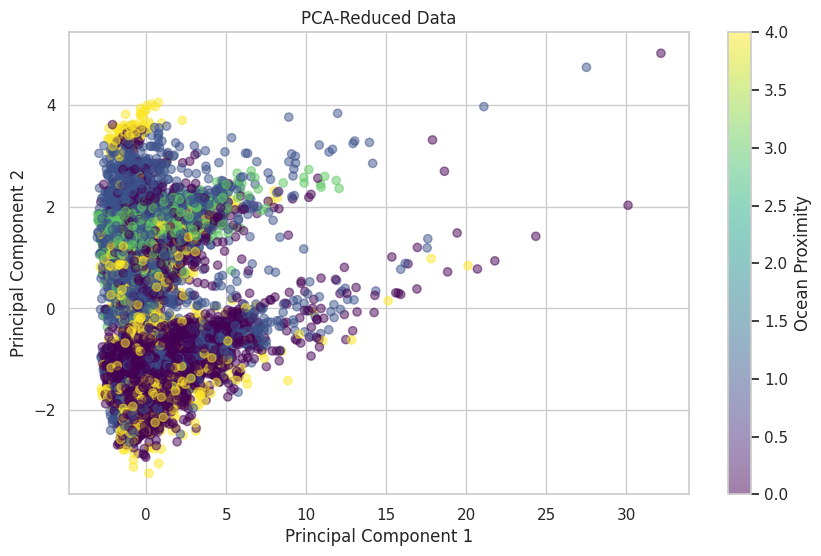

In [245]:
# Visualization: PCA-Reduced Data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Ocean Proximity')
plt.grid(True)
plt.show()

In [246]:
# Analysis of Visualization
# The PCA-reduced data plot demonstrates how dimensionality reduction can help visualize high-dimensional data in a lower-dimensional space.
# Data points from different classes (ocean proximity categories) can be seen in a 2D scatter plot.

In [247]:
#8. RANDOM FOREST

In [248]:
# Data Preprocessing


In [249]:
# Drop rows with missing values
data.dropna(inplace=True)


In [250]:
# Convert categorical 'ocean_proximity' to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

In [251]:
# Split the data into features (X) and target (y)
X = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']


In [252]:
# Split the data into features (X) and target (y)
X = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']


In [253]:
# Build and Train Random Forest Classifier

In [254]:
# Initialize the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)



In [255]:
# Train the model on the training data
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [256]:
# Model Evaluation

In [257]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [258]:
# Generate classification report and confusion matrix
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [259]:
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9772286821705426
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1795
           1       0.99      0.98      0.99      1324
           2       1.00      1.00      1.00         1
           3       0.97      0.99      0.98       436
           4       0.97      0.92      0.95       572

    accuracy                           0.98      4128
   macro avg       0.98      0.98      0.98      4128
weighted avg       0.98      0.98      0.98      4128

Confusion Matrix:
 [[1774    6    0    3   12]
 [  21 1303    0    0    0]
 [   0    0    1    0    0]
 [   2    1    0  431    2]
 [  38    0    0    9  525]]


In [260]:
# Analysis and Insights

# Random Forest Classifier
# The random forest classifier is an ensemble learning method that builds multiple decision trees and combines their predictions.

# Model Performance
# The accuracy score provides an indication of how well the random forest classifier performs on the test data.

# Classification Report
# The classification report includes metrics such as precision, recall, and F1-score for each class, providing insights into the model's performance on individual classes.

# Confusion Matrix
# The confusion matrix visually shows the number of correct and incorrect predictions for each class.

# The random forest classifier is a versatile algorithm that can handle complex relationships in the data. By analyzing the classification report and confusion matrix, you can gain insights into the model's strengths and areas for improvement.


In [261]:
# 9. GRADIENT BOOSTING

In [262]:
from sklearn.ensemble import GradientBoostingClassifier

In [263]:
# Data Preprocessing

In [264]:
# Drop rows with missing values
data.dropna(inplace=True)



In [265]:
# Convert categorical 'ocean_proximity' to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])


In [266]:
# Split the data into features (X) and target (y)
X = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']

In [267]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:

# Build and Train Gradient Boosting Classifier


In [269]:
# Initialize the gradient boosting classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [270]:
# Train the model on the training data
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [271]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [272]:
# Model Evaluation

In [273]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [274]:
# Generate classification report and confusion matrix
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [275]:
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.96875
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1795
           1       0.99      0.98      0.98      1324
           2       1.00      1.00      1.00         1
           3       0.97      1.00      0.98       436
           4       0.95      0.91      0.93       572

    accuracy                           0.97      4128
   macro avg       0.97      0.97      0.97      4128
weighted avg       0.97      0.97      0.97      4128

Confusion Matrix:
 [[1750   13    0    5   27]
 [  31 1293    0    0    0]
 [   0    0    1    0    0]
 [   0    0    0  434    2]
 [  41    1    0    9  521]]


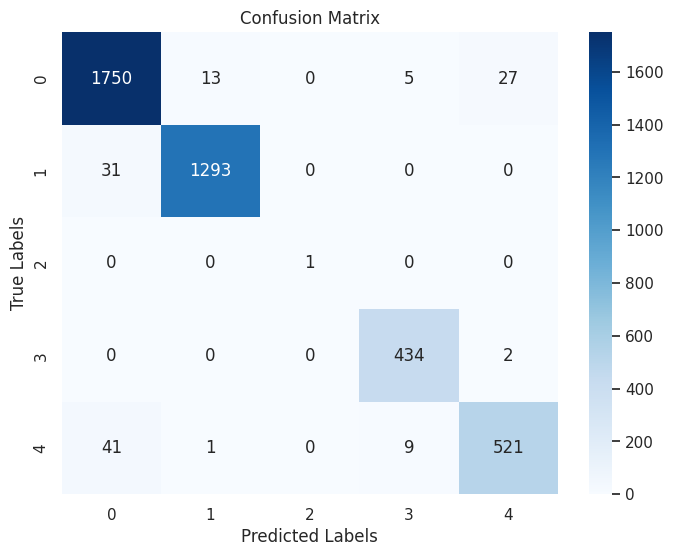

In [276]:
# Visualization: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [277]:
# Analysis and Insights

# Gradient Boosting Classifier
# The gradient boosting classifier is an ensemble learning method that combines multiple weak learners to create a strong predictive model.

# Model Performance
# The accuracy score provides an indication of how well the gradient boosting classifier performs on the test data.

# Classification Report
# The classification report includes metrics such as precision, recall, and F1-score for each class, providing insights into the model's performance on individual classes.

# Confusion Matrix
# The confusion matrix visually shows the number of correct and incorrect predictions for each class.

# The gradient boosting classifier is powerful and often yields strong performance. By analyzing the classification report and confusion matrix, you can gain insights into the model's strengths and areas for improvement.
